# Large MDP: Stock trading

### Value Iteration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Define the stock trading problem
NUM_WEATHER_CONDITIONS = 10
NUM_STOCK_PRICES = 100
NUM_STATES = NUM_WEATHER_CONDITIONS * NUM_STOCK_PRICES
NUM_ACTIONS = 3  # Buy, Sell, Hold



In [3]:

# Initialize
rewards = np.zeros((NUM_WEATHER_CONDITIONS, NUM_STOCK_PRICES, NUM_ACTIONS))
# Populate rewards (example values, adjust as needed)
for weather in range(NUM_WEATHER_CONDITIONS):
    for price in range(NUM_STOCK_PRICES):
        for action in range(NUM_ACTIONS):
            if action == 0:  # Buy
                rewards[weather, price, action] = min(weather, price) / 100.0  # Buy when weather is favorable and price is low
            elif action == 1:  # Sell
                rewards[weather, price, action] = max(weather, price) / 100.0  # Sell when weather is unfavorable or price is high
            else:  # Hold
                rewards[weather, price, action] = 0.0  # No immediate reward for holding

# Initialize value function
V = np.zeros((NUM_WEATHER_CONDITIONS, NUM_STOCK_PRICES))
# Define discount factor
discount_factor = 0.99
# Convergence threshold
threshold = 1e-6
Values= []
total_iter = []

In [4]:
# Maximum number of iterations
max_iterations = 1000

# Value iteration
for iteration in range(max_iterations):
    delta = 0
    for weather in range(NUM_WEATHER_CONDITIONS):
        for price in range(NUM_STOCK_PRICES):
            old_value = V[weather, price]

            # Compute the value for each action
            action_values = []
            for action in range(NUM_ACTIONS):
                expected_value = rewards[weather, price, action]
                if action == 0:  # Buy
                    expected_value += discount_factor * V[min(weather + 1, NUM_WEATHER_CONDITIONS - 1), min(price + 1, NUM_STOCK_PRICES - 1)]
                elif action == 1:  # Sell
                    expected_value += discount_factor * V[max(weather - 1, 0), max(price - 1, 0)]
                else:  # Hold
                    expected_value += discount_factor * V[weather, price]

                action_values.append(expected_value)

            # Update the value function with the maximum value
            V[weather, price] = max(action_values)

            delta = max(delta, abs(old_value - V[weather, price]))
    Values.append(V[weather, price])
    total_iter.append( iteration )
    if delta < threshold:
        print(f"Value iteration converged after {iteration + 1} iterations.")
        break


# Derive optimal policy from the optimal value function
policy = np.zeros((NUM_WEATHER_CONDITIONS, NUM_STOCK_PRICES), dtype=int)
for weather in range(NUM_WEATHER_CONDITIONS):
    for price in range(NUM_STOCK_PRICES):
        action_values = []
        for action in range(NUM_ACTIONS):
            expected_value = rewards[weather, price, action]
            if action == 0:  # Buy
                expected_value += discount_factor * V[min(weather + 1, NUM_WEATHER_CONDITIONS - 1), min(price + 1, NUM_STOCK_PRICES - 1)]
            elif action == 1:  # Sell
                expected_value += discount_factor * V[max(weather - 1, 0), max(price - 1, 0)]
            else:  # Hold
                expected_value += discount_factor * V[weather, price]

            action_values.append(expected_value)

        policy[weather, price] = np.argmax(action_values)



Value iteration converged after 686 iterations.


In [5]:
# Print the optimal value function and policy
print("Optimal Value Function:")
print(V)
print("Optimal Policy (0: Buy, 1: Sell, 2: Hold):")
value_iteration_policy = policy
print(policy)

Optimal Value Function:
[[25.09924902 25.26629501 25.43502833 25.60546601 25.77762527 25.95152351
  26.12717829 26.30460735 26.48382861 26.66486017 26.84772033 27.03242756
  27.2190005  27.40745801 27.59781913 27.79010307 27.98432927 28.18051734
  28.3786871  28.57885857 28.78105196 28.9852877  29.19158642 29.39996896
  29.61045637 29.8230699  30.03783104 30.25476147 30.47388311 30.6952181
  30.91878878 31.14461775 31.37272781 31.603142   31.83588361 32.07097613
  32.30844332 32.54830916 32.79059788 33.03533395 33.2825421  33.53224729
  33.78447475 34.03924996 34.29659865 34.55654681 34.81912071 35.08434686
  35.35225206 35.62286336 35.89620811 36.17231391 36.45120865 36.7329205
  37.01747792 37.30490966 37.59524473 37.88851248 38.18474253 38.48396479
  38.78620949 39.09150717 39.39988865 39.7113851  40.02602796 40.34384904
  40.66488042 40.98915454 41.31670415 41.64756233 41.98176252 42.31933845
  42.66032424 43.00475433 43.3526635  43.70408691 44.05906004 44.41761875
  44.77979926 45

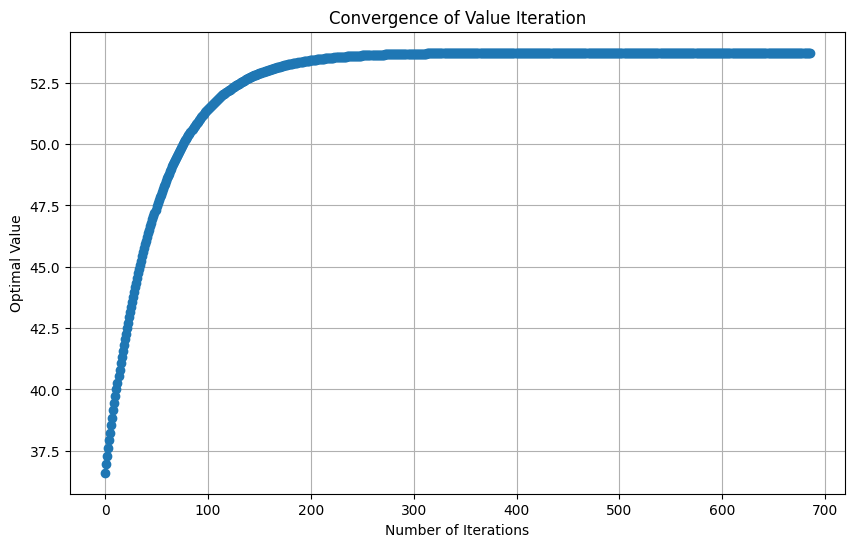

In [6]:

optimal_value_function =V
optimal_policy = policy

iterations = total_iter
value_over_iterations = Values

plt.figure(figsize=(10, 6))
plt.plot(iterations, value_over_iterations, marker='o')
plt.title('Convergence of Value Iteration')
plt.xlabel('Number of Iterations')
plt.ylabel('Optimal Value')
plt.grid(True)
plt.show()


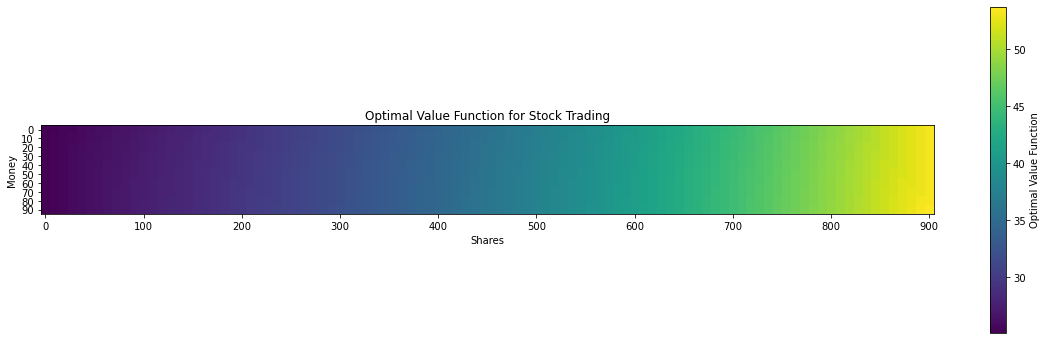

In [ ]:
# Plot the Optimal Value Function as a heatmap
plt.figure(figsize=(20, 6))
plt.imshow(optimal_value_function, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Optimal Value Function')
plt.title('Optimal Value Function for Stock Trading')
plt.xlabel('Shares')
plt.ylabel('Money')
xticks_placement = np.linspace(0, optimal_value_function.shape[1] - 1, 10, dtype=int)
yticks_placement = np.linspace(0, optimal_value_function.shape[0] - 1, 10, dtype=int)
plt.xticks(xticks_placement, labels=np.arange(0, optimal_value_function.shape[1]*100, 100))
plt.yticks(yticks_placement, labels=np.arange(0, optimal_value_function.shape[0]*10, 10))
plt.grid(False)
plt.show()

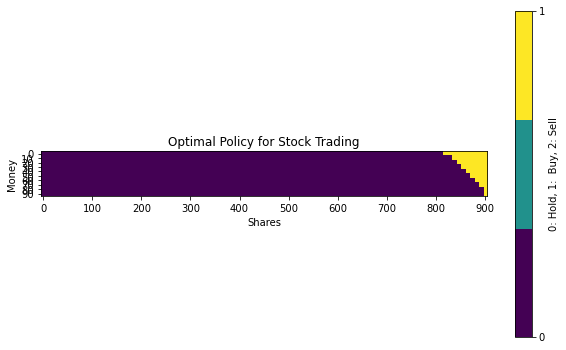

In [ ]:
# Create a color map for the optimal policy
cmap = plt.get_cmap('viridis', 3)  # 3 discrete colors for the 3 actions

# Plot the Optimal Policy as a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(optimal_policy, cmap=cmap, interpolation='nearest')
plt.colorbar(ticks=[0, 1, 2], label='0: Hold, 1:  Buy, 2: Sell')
plt.title('Optimal Policy for Stock Trading')
plt.xlabel('Shares')
plt.ylabel('Money')
plt.xticks(xticks_placement, labels=np.arange(0, optimal_value_function.shape[1]*100, 100))
plt.yticks(yticks_placement, labels=np.arange(0, optimal_value_function.shape[0]*10, 10))
plt.grid(False)
plt.show()

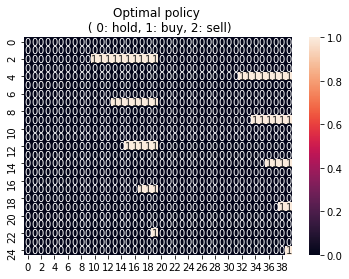

In [ ]:
from bettermdptools.utils.plots import Plots
size=(25,40)
Plots.values_heat_map(optimal_policy, "Optimal policy \n ( 0: hold, 1: buy, 2: sell)", size)


## Policy Iteration

In [ ]:
# Define the grid world
NUM_ROWS = 25
NUM_COLS = 40
NUM_ACTIONS = 4

# Define rewards for each state
rewards = np.zeros((NUM_ROWS, NUM_COLS))
rewards[NUM_ROWS - 1, NUM_COLS - 1] = 1
rewards[NUM_ROWS - 2, NUM_COLS - 1] = -1

# Define actions (Up, Down, Left, Right)
actions = {
    0: (-1, 0),  # Up
    1: (1, 0),   # Down
    2: (0, -1),  # Left
    3: (0, 1)    # Right
}

policy = np.random.randint(0, NUM_ACTIONS, size=(NUM_ROWS, NUM_COLS))
discount_factor = 0.99
threshold = 1e-6
max_iterations = 1000
pr_eval = True
pr_iter =True


delta_over_iter =[]
iters=[]
for iteration in range(max_iterations):
    # Policy evaluation
    delta = 0
    if True:
        for i in range(NUM_ROWS):
            for j in range(NUM_COLS):
                if rewards[i, j] is None:
                    continue

                old_value = rewards[i, j]
                action = actions[policy[i, j]]
                new_i, new_j = i + action[0], j + action[1]
                new_i = max(0, min(new_i, NUM_ROWS - 1))
                new_j = max(0, min(new_j, NUM_COLS - 1))

                if rewards[new_i, new_j] is not None:
                    rewards[i, j] = rewards[i, j] + discount_factor * rewards[new_i, new_j]
                    delta = max(delta, abs(old_value - rewards[i, j]))


    delta_over_iter.append(delta)
    iters.append(iteration)
    if delta < threshold and pr_eval:
        pr_eval = False
        print(f"Policy evaluation converged after {iteration + 1} iterations.")


    # Policy improvement
    policy_stable = True
    for i in range(NUM_ROWS):
        for j in range(NUM_COLS):
            if rewards[i, j] is None:
                continue  # Skip obstacle states
            old_action = policy[i, j]
            best_action = None
            best_value = float('-inf')
            for a in range(NUM_ACTIONS):
                action = actions[a]
                new_i, new_j = i + action[0], j + action[1]
                if 0 <= new_i < NUM_ROWS and 0 <= new_j < NUM_COLS and rewards[new_i, new_j] is not None:
                    if rewards[new_i, new_j] > best_value:
                        best_value = rewards[new_i, new_j]
                        best_action = a

            if best_action is None:

                valid_actions = [a for a in range(NUM_ACTIONS) if 0 <= i + actions[a][0] < NUM_ROWS and 0 <= j + actions[a][1] < NUM_COLS and rewards[i + actions[a][0], j + actions[a][1]] is not None]
                best_action = np.random.choice(valid_actions)

            policy[i, j] = best_action
            if old_action != best_action:
                policy_stable = False


    # Check convergence
    if policy_stable and pr_iter:
        print(f"Policy iteration converged after {iteration + 1} iterations.")
        pr_iter= False

    elif iteration == max_iterations - 1:
        print("Maximum iterations reached without convergence.")
    if delta < threshold and policy_stable:
        break

# Print the final policy
print("Final Policy:")
policy_iteration_policy = policy
print(policy)


Policy iteration converged after 62 iterations.


<ipython-input-129-1e1143bec995>:57: RuntimeWarning: overflow encountered in double_scalars
  rewards[i, j] = rewards[i, j] + discount_factor * rewards[new_i, new_j]
<ipython-input-129-1e1143bec995>:58: RuntimeWarning: invalid value encountered in double_scalars
  delta = max(delta, abs(old_value - rewards[i, j]))


Policy evaluation converged after 778 iterations.
Final Policy:
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 

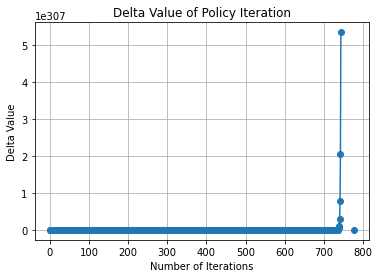

In [ ]:

plt.plot( iters,delta_over_iter, marker='o')
plt.title('Delta Value of Policy Iteration')
plt.xlabel('Number of Iterations')
plt.ylabel('Delta Value')
plt.grid(True)
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

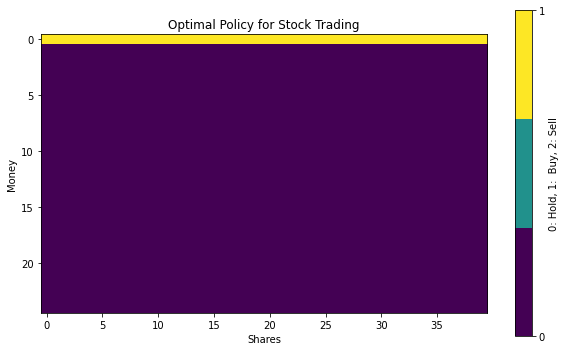

In [ ]:

# Plot the Optimal Policy as a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(optimal_policy, cmap=plt.get_cmap('viridis', 3), interpolation='nearest')
plt.colorbar(ticks=[0, 1, 2], label='0: Hold, 1:  Buy, 2: Sell')
plt.title('Optimal Policy for Stock Trading')
plt.xlabel('Shares')
plt.ylabel('Money')
plt.xticks(xticks_placement, labels=np.arange(0, optimal_policy*100, 100))
plt.yticks(yticks_placement, labels=np.arange(0, optimal_policy.shape[1]*10, 10))
plt.grid(False)
plt.show()

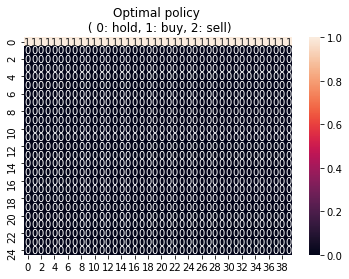

In [ ]:
from bettermdptools.utils.plots import Plots
size=(25,40)
Plots.values_heat_map(optimal_policy, "Optimal policy \n ( 0: hold, 1: buy, 2: sell)", size)


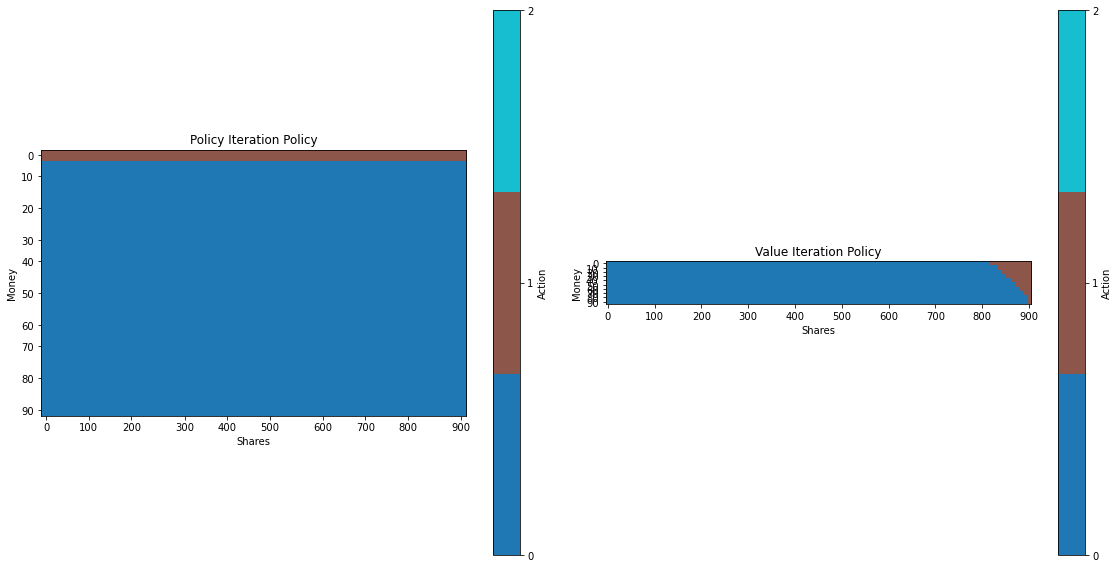

In [ ]:



# Comparison Plot
plt.figure(figsize=(16, 8))


plt.subplot(1, 2, 1)
plt.imshow(policy_iteration_policy, cmap=cmap, vmin=0, vmax=2)
plt.colorbar(ticks=[0, 1, 2], label='Action')
plt.title('Policy Iteration Policy')
plt.xlabel('Shares')
plt.ylabel('Money')
xticks_placement = np.linspace(0, policy_iteration_policy.shape[1] - 1, 10, dtype=int)
yticks_placement = np.linspace(0, policy_iteration_policy.shape[0] - 1, 10, dtype=int)
plt.xticks(xticks_placement, labels=np.arange(0, value_iteration_policy.shape[1]*10, 100))
plt.yticks(yticks_placement, labels=np.arange(0, value_iteration_policy.shape[0]*10, 10))
plt.grid(False)

xticks_placement = np.linspace(0, value_iteration_policy.shape[1] - 1, 10, dtype=int)
yticks_placement = np.linspace(0, value_iteration_policy.shape[0] - 1, 10, dtype=int)
# Value Iteration

plt.subplot(1, 2, 2)
plt.imshow(value_iteration_policy, cmap=cmap, interpolation='nearest', vmin=0, vmax=2)
plt.colorbar(ticks=[0, 1, 2], label='Action')
plt.title('Value Iteration Policy')
plt.xlabel('Shares')
plt.ylabel('Money')
plt.xticks(xticks_placement, labels=np.arange(0, value_iteration_policy.shape[1]*10, 100))
plt.yticks(yticks_placement, labels=np.arange(0, value_iteration_policy.shape[0]*10, 10))
plt.grid(False)
plt.tight_layout()
plt.show()


In [8]:
!pip install stable_baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.1/182.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 21.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-many

In [13]:
import gym
import numpy as np
from stable_baselines3 import PPO

class StockTradingEnv(gym.Env):
    def __init__(self):
        super(StockTradingEnv, self).__init__()
        self.action_space = gym.spaces.Discrete(3)  # buy, sell, hold
        self.observation_space = gym.spaces.Discrete(3)  # good, bad, neutral
        self.state = None

    def reset(self):
        self.state = self.observation_space.sample()
        return np.array([self.state])

    def step(self, action):
        if action == 0:
            if self.state == 0:
                reward = 1
            else:
                reward = -1
        elif action == 1:
            if self.state == 0:
                reward = -1
            else:
                reward = 1
        else:
            reward = 0

        done = False
        info = {}

        return np.array([self.state]), reward, done, info

# Create environment
env = StockTradingEnv()

# Train using PPO algorithm
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Test the trained model
obs = env.reset()
for _ in range(10):
    action, _states = model.predict(obs)
    obs, reward, done, info = env.step(action)
    print(f"Action: {action}, Reward: {reward}, Done: {done}, Info: {info}")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/dummy_vec_env.py:108: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.buf_obs[key][env_idx] = obs


-----------------------------
| time/              |      |
|    fps             | 849  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 648         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013796388 |
|    clip_fraction        | 0.393       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 2.33        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0499     |
|    value_loss           | 5.48        |
-----------------------------------------
----------------------------------